In [40]:
from matplotlib import use, cm
use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from sklearn import linear_model
from numpy import eye
%matplotlib inline  

In [41]:
## Machine Learning Online Class - Exercise 1: Linear Regression

# x refers to the population size in 10,000s
# y refers to the profit in $10,000s

In [42]:
# WarmUpExercice.py
#=============================

def warmUpExercise():
    """ an example function that returns the 5x5 identity matrix
   """

    return eye(5)

In [43]:
# ==================== Part 1: Basic Function ====================
# Complete warmUpExercise.py
print 'Running warmUpExercise ...'
print '5x5 Identity Matrix:'
warmup = warmUpExercise()
print warmup

Running warmUpExercise ...
5x5 Identity Matrix:
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [44]:
# ======================= Part 2: Plotting =======================
data = np.loadtxt('C:\Users\HTDA\Coursera-Stanford-ML-Python\ex1\ex1data1.txt', delimiter=',')
m = data.shape[0]
X = np.vstack(zip(np.ones(m),data[:,0]))
y = data[:, 1]

In [45]:
#plotData.py
#========================================

def plotData(data):
    """
    plots the data points and gives the figure axes labels of
    population and profit.
    """
    plt.figure()  # open a new figure window
    plt.plot(data[:,0],data[:,1], 'rx', markersize=10)
    plt.xlabel("Profit in $10,000s');")
    plt.ylabel("Population of City in 10,000s")

# ============================================================

Plotting Data ...


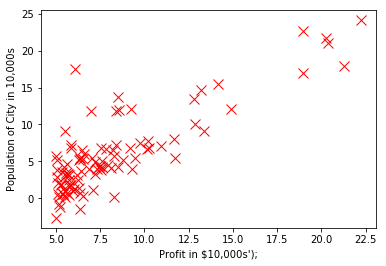

In [46]:
print 'Plotting Data ...'
plotData(data)

# _______________ Part 3: Gradient descent _______________

In [47]:
def computeCost(X, y, theta):
    """
       computes the cost of using theta as the parameter for linear 
       regression to fit the data points in X and y
    """
    m = y.size
    #J =  sum((np.apply_along_axis(sum,1,theta*X) - y) **2) /(2*m)  --- alternative method
    J =  np.linalg.norm(np.apply_along_axis(sum,1,theta*X) - y)**2/(2*m)

    return J

In [48]:
theta = np.zeros(2)
# compute and display initial cost
J = computeCost(X, y, theta)
print 'Initial cost: %0.4f ' % J

Initial cost: 32.0727 


In [49]:
# Some gradient descent settings
iterations = 10000
alpha = 0.01

In [50]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
     Performs gradient descent to learn theta
       theta = gradientDescent(x, y, theta, alpha, num_iters) updates theta by
       taking num_iters gradient steps with learning rate alpha
    """

    # Initialize some useful values
    J_history = []
    m = y.size  # number of training examples

    for i in range(num_iters):
        theta = theta - (alpha/m) * np.dot((np.apply_along_axis(sum,1,theta*X) - y).T, X)
        J_history.append(computeCost(X, y, theta))

    return theta, J_history


In [51]:
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print 'Theta found by gradient descent: '
print '%s %s \n' % (theta[0], theta[1])

Theta found by gradient descent: 
-3.89578082027 1.19303363836 



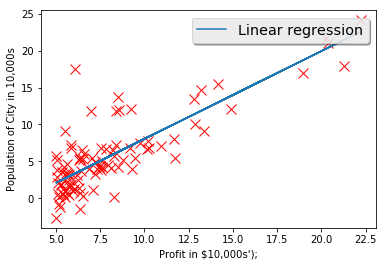

In [52]:
# Plot the linear fit
plt.figure()
plotData(data)
plt.plot(X[:, 1], X.dot(theta), '-', label='Linear regression')
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)

In [53]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
predict2 = np.array([1, 7]).dot(theta)
print 'For population = 35,000, we predict a profit of {:.4f}'.format(predict1*10000)
print 'For population = 70,000, we predict a profit of {:.4f}'.format(predict2*10000)

For population = 35,000, we predict a profit of 2798.3691
For population = 70,000, we predict a profit of 44554.5465


In [54]:
# ============= Part 4: Visualizing J(theta_0, theta_1) =============

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, X.shape[0])
theta1_vals = np.linspace(-1, 4, X.shape[0])

# initialize J_vals to a matrix of 0's
J_vals=np.array(np.zeros(X.shape[0]).T)

for i in range(theta0_vals.size):
    col = []
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        col.append(computeCost(X, y, t.T))
    J_vals=np.column_stack((J_vals,col))

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals[:,1:].T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

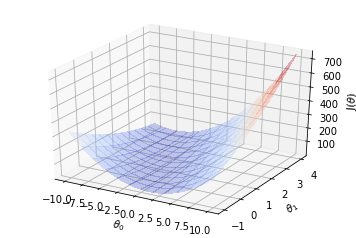

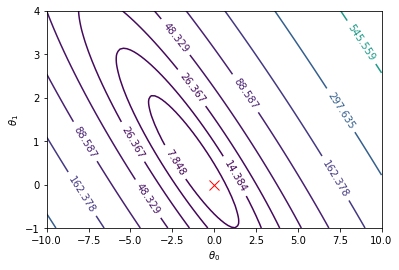

In [55]:
# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=8, cstride=8, alpha=0.3,
                cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta$)')

# Contour plot
plt.figure()

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.clabel(ax, inline=1, fontsize=10)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(0.0, 0.0, 'rx', linewidth=2, markersize=10)

Theta found by scikit: 
-3.89578087831 1.19303364419 

For population = 35,000, we predict a profit of 2798.3688
For population = 70,000, we predict a profit of 44554.5463


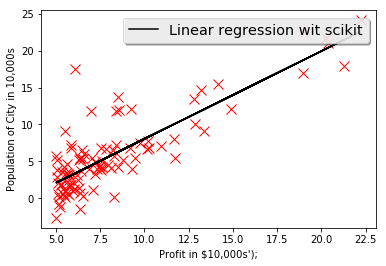

In [56]:
# =============Use Scikit-learn =============
regr = linear_model.LinearRegression(fit_intercept=False, normalize=True)
regr.fit(X, y)

print 'Theta found by scikit: '
print '%s %s \n' % (regr.coef_[0], regr.coef_[1])

predict1 = np.array([1, 3.5]).dot(regr.coef_)
predict2 = np.array([1, 7]).dot(regr.coef_)
print 'For population = 35,000, we predict a profit of {:.4f}'.format(predict1*10000)
print 'For population = 70,000, we predict a profit of {:.4f}'.format(predict2*10000)

plt.figure()
plotData(data)
plt.plot(X[:, 1],  X.dot(regr.coef_), '-', color='black', label='Linear regression wit scikit')
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)